In [1]:
from PIL import Image

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
filename = 'materialism 0.png'

In [4]:
page = Image.open('materialism 0.png')

In [5]:
type(page)

PIL.PngImagePlugin.PngImageFile

In [6]:
# Load the original image, and get its size and color mode.
orig_image = Image.open('materialism 0.png')
width, height = orig_image.size
mode = orig_image.mode

In [7]:
# Show information about the original image.
print(f"Original image: {filename}")
print(f"Size: {width} x {height} pixels")
print(f"Mode: {mode}")

Original image: materialism 0.png
Size: 1700 x 2200 pixels
Mode: RGB


In [8]:
# Load all pixels from the image.
orig_pixel_map = orig_image.load()

# Create a new image matching the original image's color mode, and size.
#   Load all the pixels from this new image as well.
new_image = Image.new(mode, (width, height))
new_pixel_map = new_image.load()

In [9]:
# Modify each pixel in the new image.
for x in range(width):
    for y in range(height):
        # Copy the original pixel to the new pixel map.
        new_pixel_map[x, y] = orig_pixel_map[x, y]

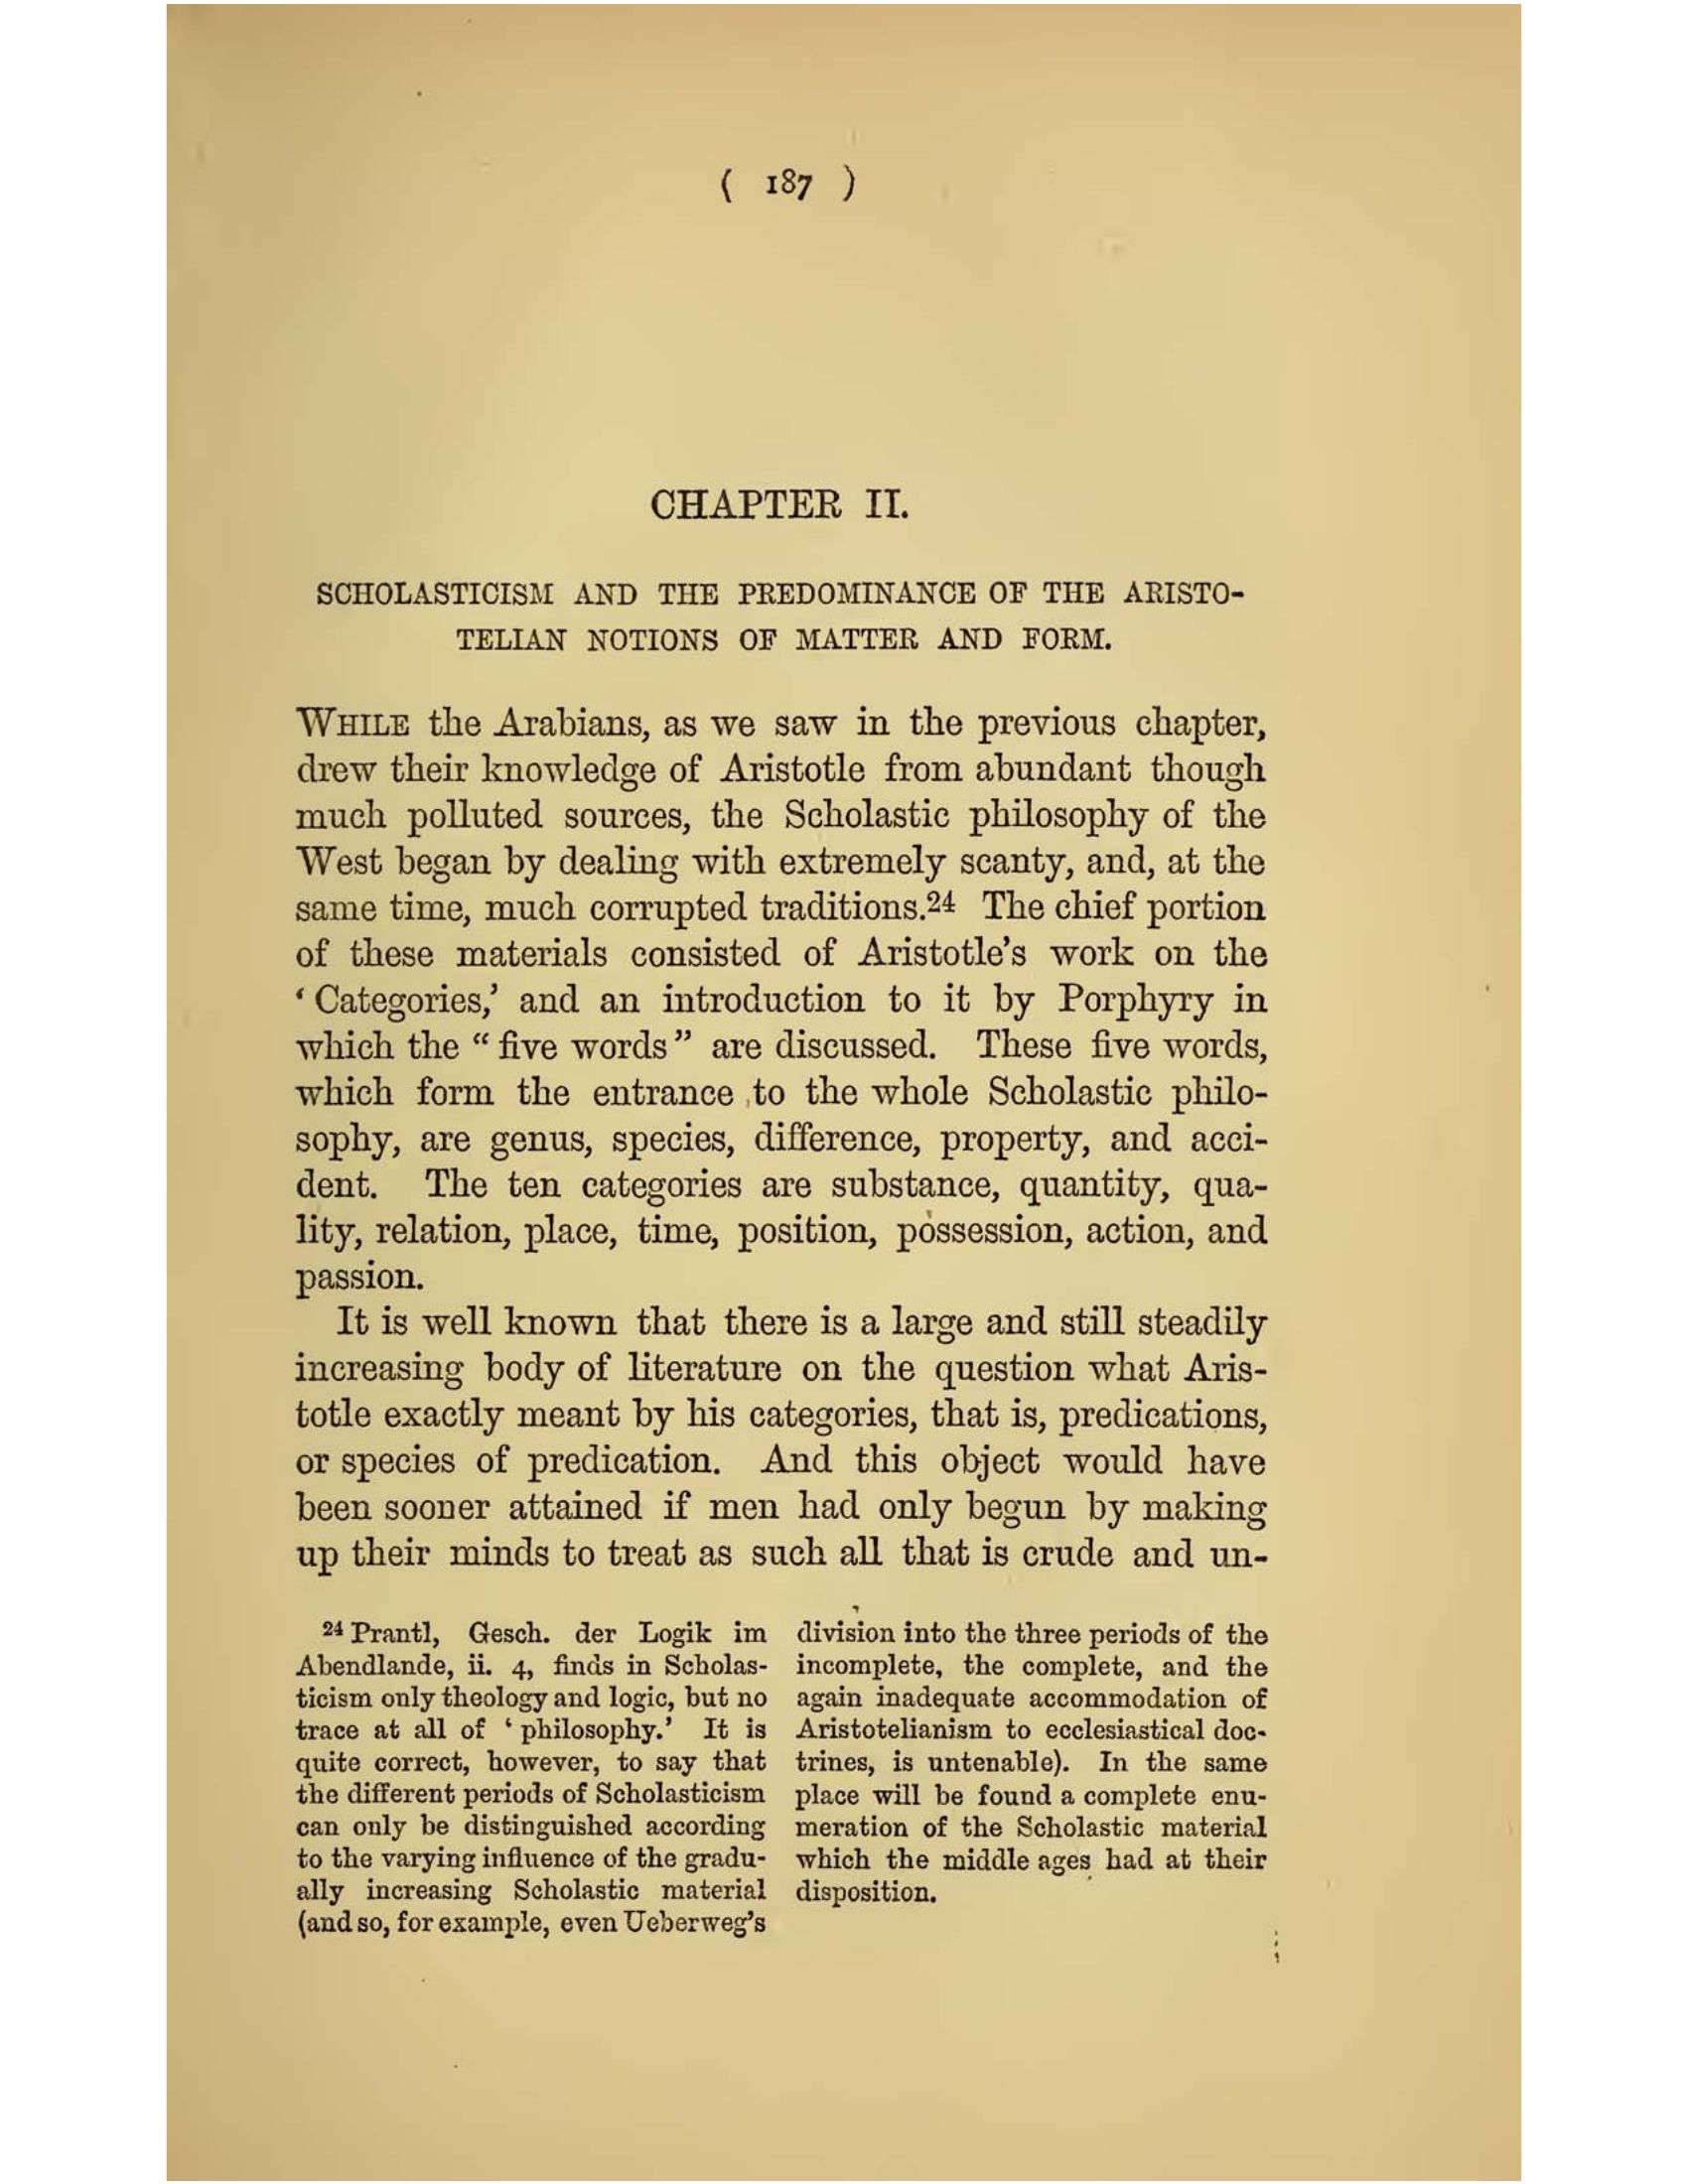

In [10]:
new_image

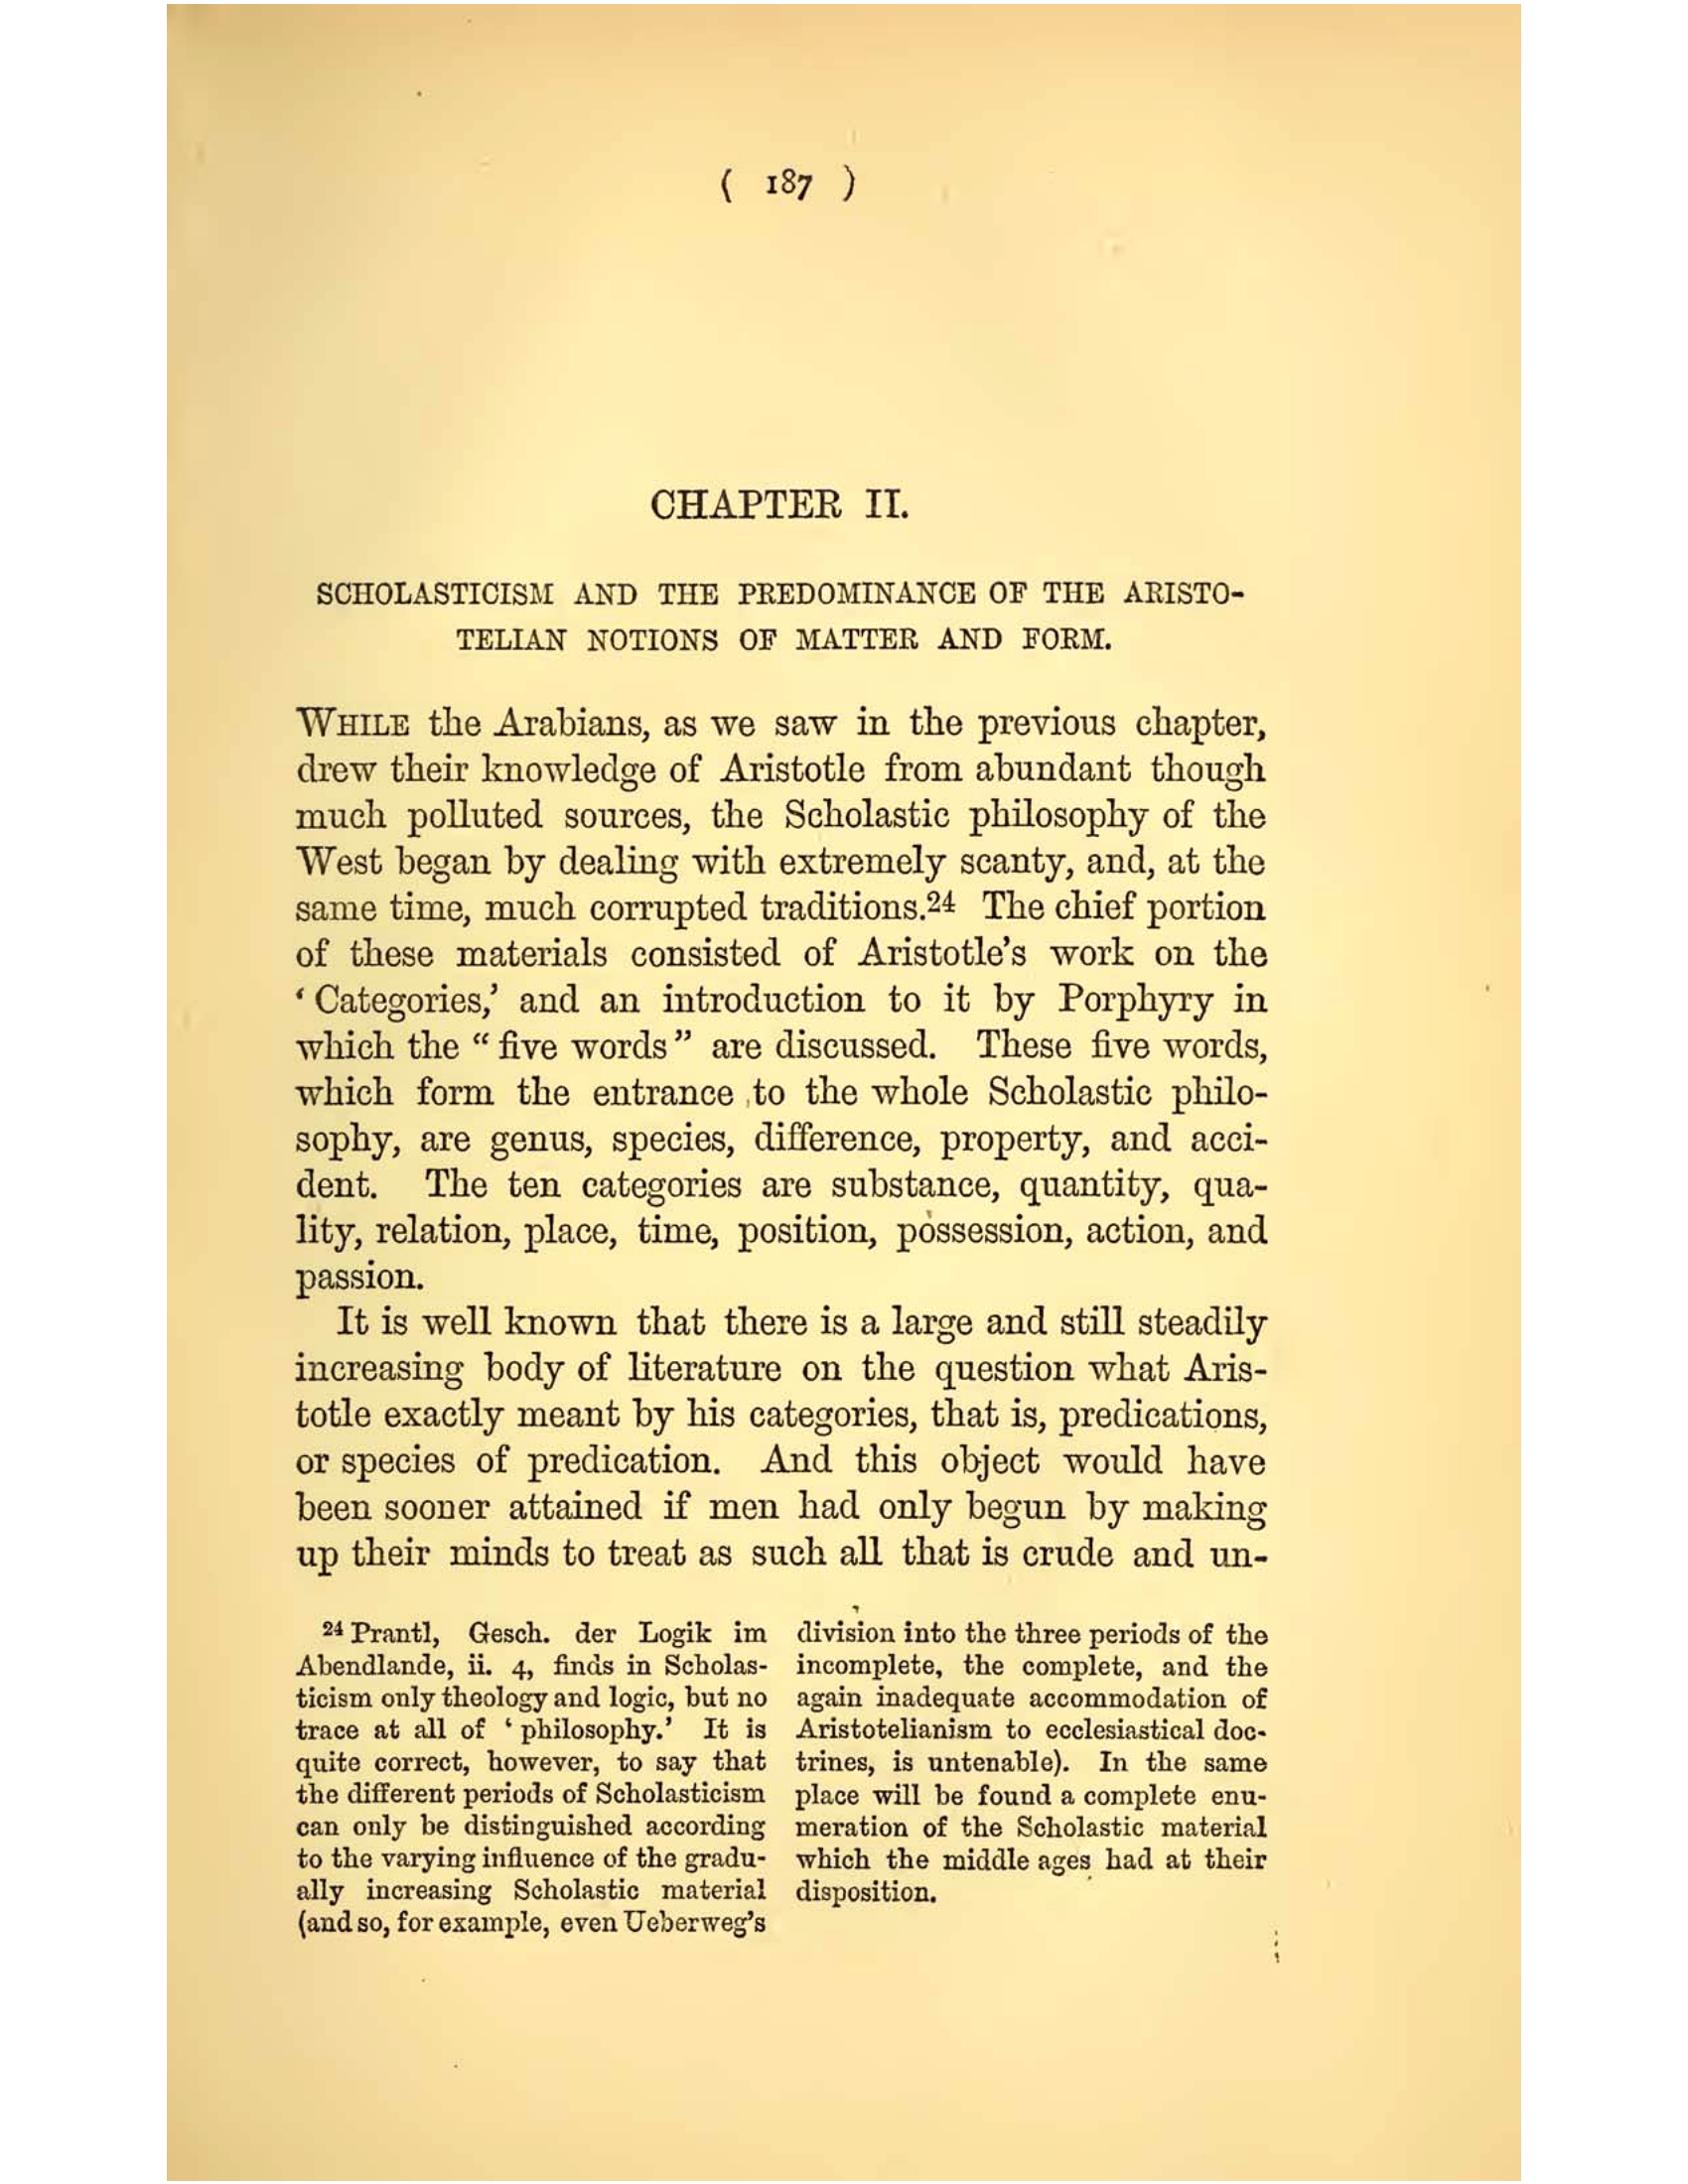

In [11]:
# Brighten each pixel in the new image.
brightness_factor = 1.155
for x in range(width):
    for y in range(height):
        # Grab the current pixel, and the component RGB values.
        orig_pixel = orig_pixel_map[x, y]
        orig_r = orig_pixel[0]
        orig_g = orig_pixel[1]
        orig_b = orig_pixel[2]

        # Copy this data over to the corresponding pixel in the new image.
        new_r = int(orig_r * brightness_factor)
        new_g = int(orig_g * brightness_factor)
        new_b = int(orig_b * brightness_factor)
        new_pixel = (new_r, new_g, new_b)
        new_pixel_map[x, y] = new_pixel

new_image

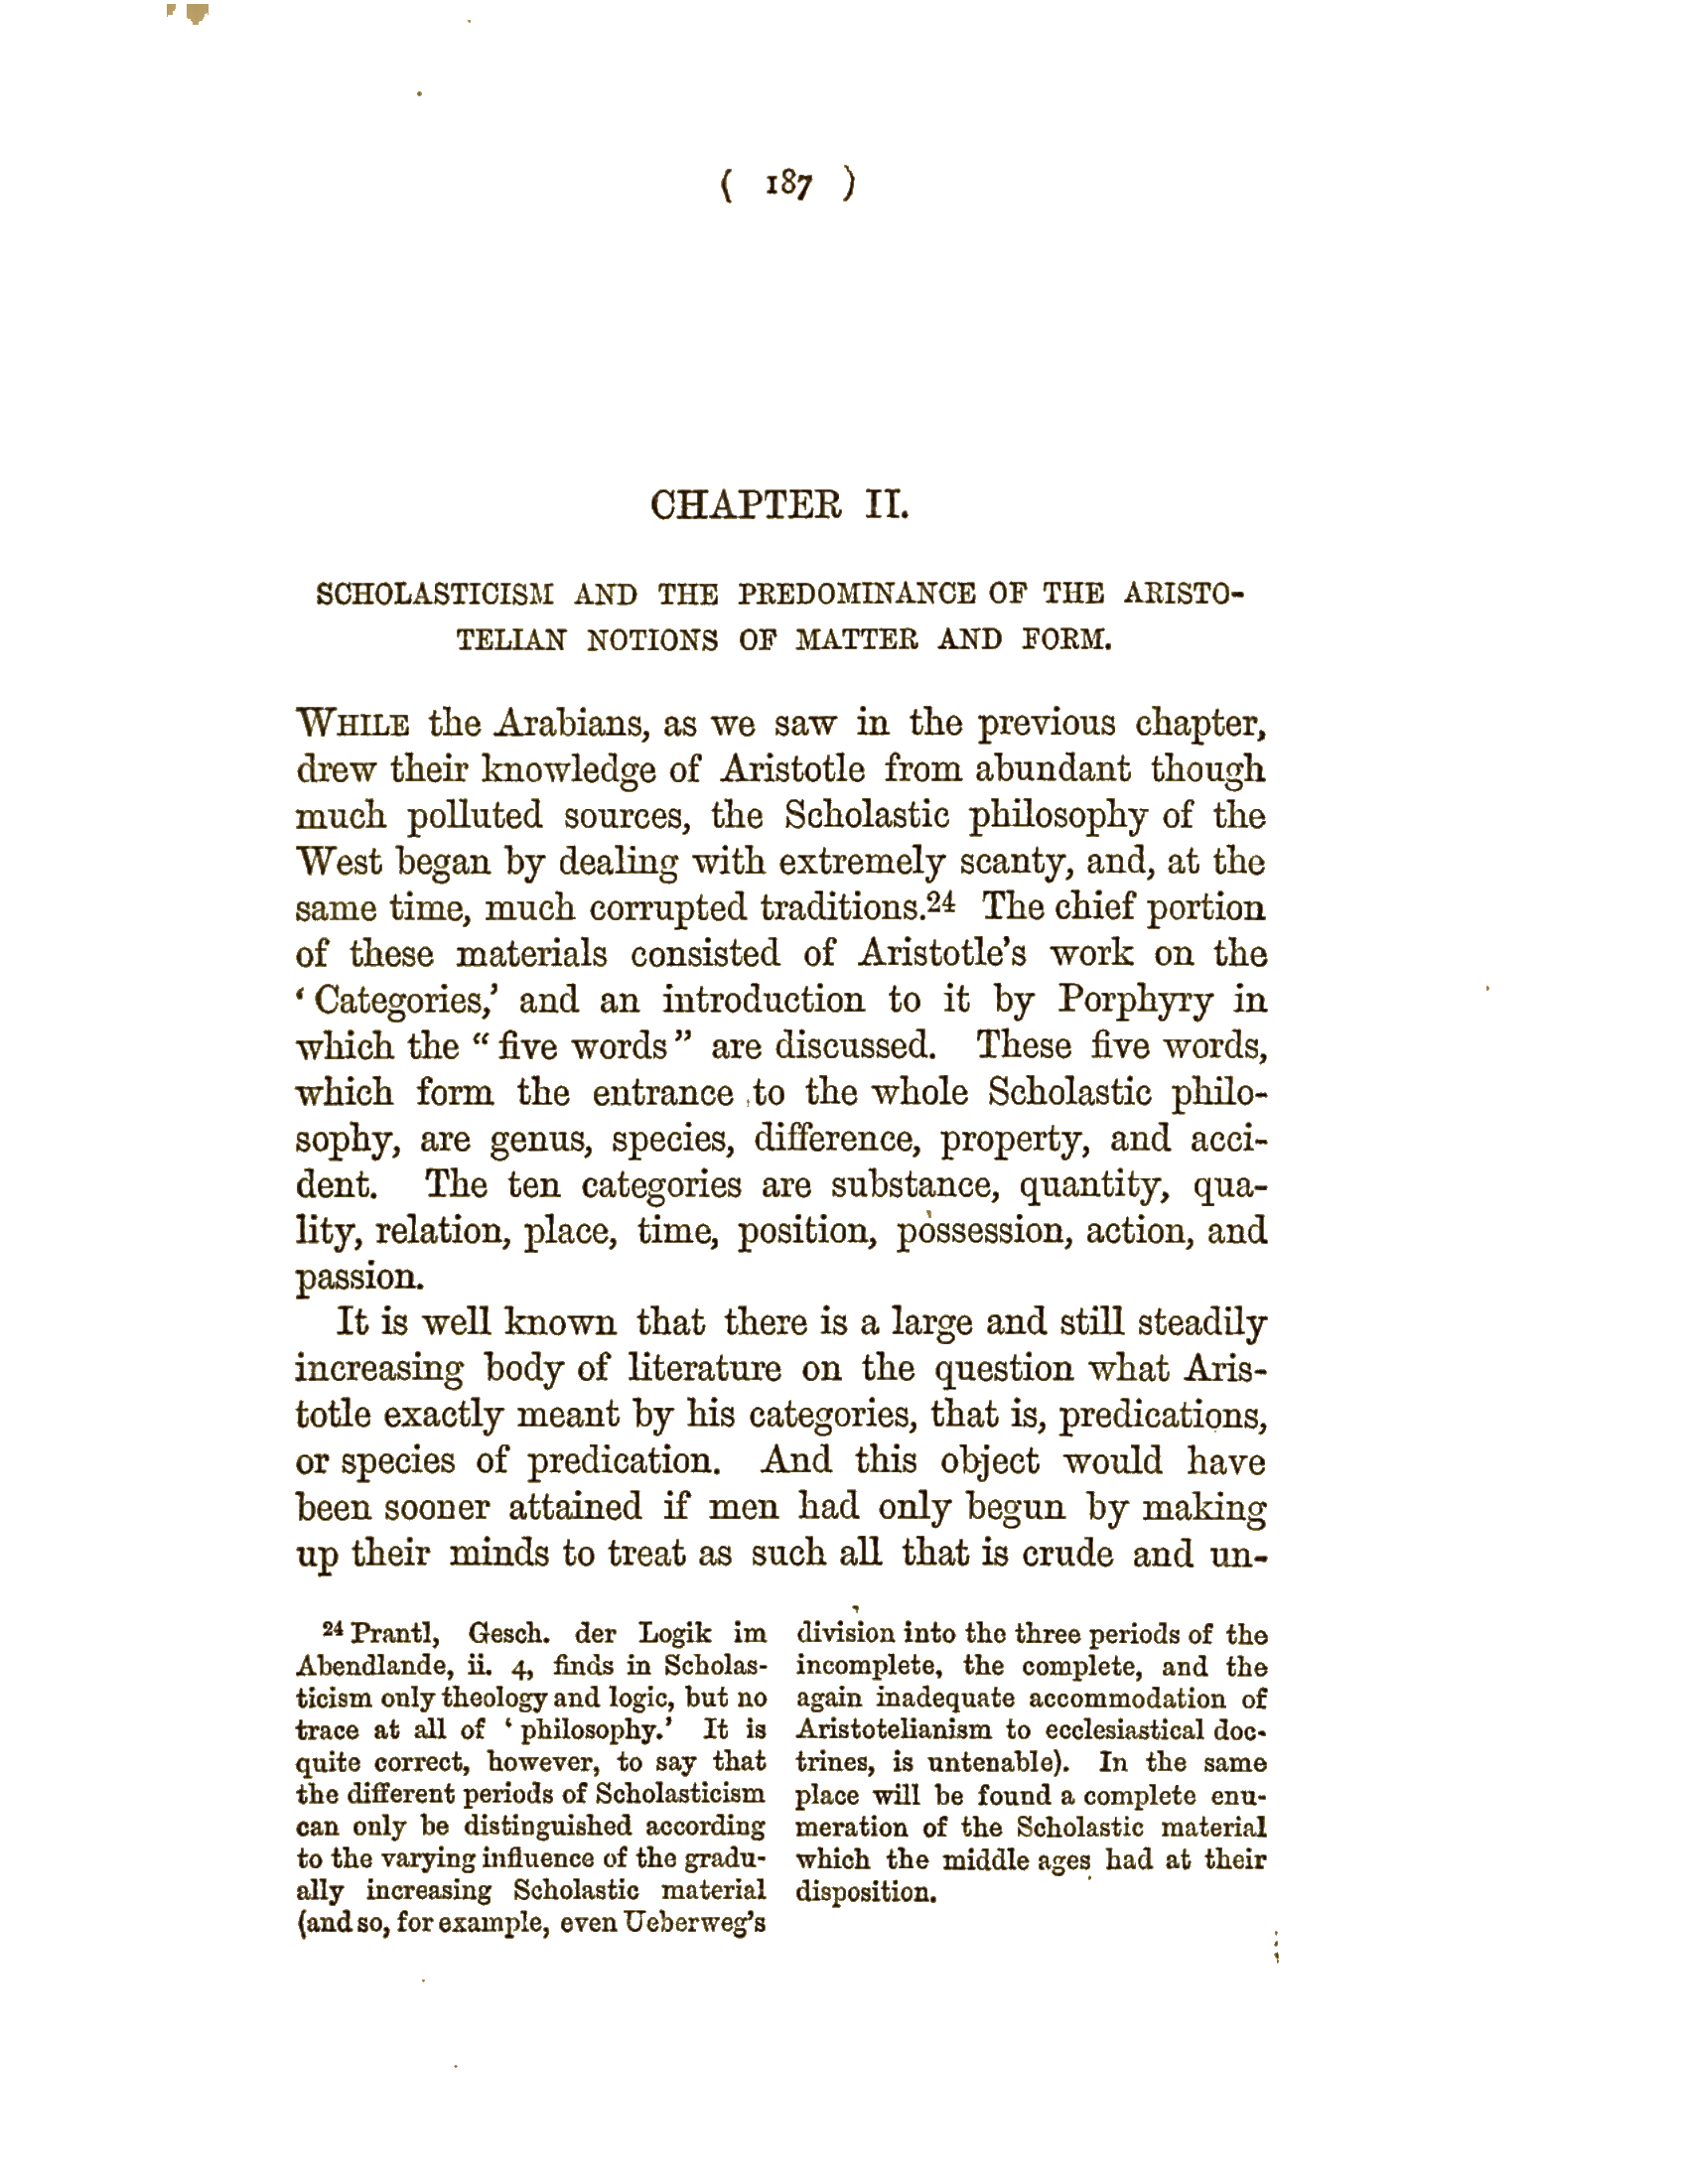

In [12]:
for x in range(width):
    for y in range(height):
        r,g,b = orig_pixel_map[x,y]
        if sum((r,g,b)) > 450: # Empirically determined anything > 450 is not text
            new_pixel_map[x,y] = (255,255,255,255) # make the pixel white
        else:
            new_pixel_map[x,y] = (r,g,b)
            
new_image